In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.4.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [ ]:
# Import imdb
#50 000 reviews of movies labeled as either positive or negative (1 is good, 0 is bad)
import tensorflow.keras.datasets.imdb as imdb


In [ ]:
# Download and assign the data set using load_data()
(x_train, y_train), (x_test, y_test) = imdb.load_data()


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Inspect the dataset

In [ ]:
# Inspect the type of the data
type(x_train)


numpy.ndarray

In [ ]:
# Inspect the shape of the data
#25 000 in train and test datasets
x_train.shape


(25000,)

In [ ]:
# Display the first dataset element input
# Notice encoding
x_train[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
# Display the first dataset element output
y_train[0]


1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz',index_from=3)

# ~/.keras/dataset/

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [ ]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=500)


In [ ]:
# Ignore the top 10 most frequent words using skip_top
imdb.load_data(skip_top=10, oov_char=2)


In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(maxlen=(500))


In [ ]:
 # Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=1)
 

#### Explore the dataset word index

In [ ]:
# Load the imdb word index using get_word_index()
imdb_word_index = imdb.get_word_index()


In [ ]:
# View the word index as a dictionary,
# accounting for index_from (which by default is 3).
index_from = 3

imdb_word_index = {key: value + index_from for key,value in imdb_word_index.items()}



In [ ]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']


52256

In [ ]:
#The most frequent word is 'the', hence its index should be index_from + frequency_index = 3 + 1 = 4
imdb_word_index['the']

4

In [ ]:
# View an input sentence

#First inverse the keys and values in the dictionary
inv_word_index = {value:key for key, value in imdb_word_index.items()}

#Then view the first input sequence in words
input_sequence = [inv_word_index[index] for index in x_train[0] if index > index_from]
input_sequence

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [ ]:
# Get the sentiment value
y_train[0]


1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set
import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

#### Preprocess the data with padding

In [ ]:
# Inspect the input data shape
x_train.shape


(25000,)

In [ ]:
# Pad the inputs to the maximum length using maxlen
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x_train = pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')


In [ ]:
# Inspect the output data shape
padded_x_train.shape


(25000, 300)

#### Create a Masking layer

In [ ]:
# Import numpy 
import numpy as np


In [ ]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, axis=-1)

In [ ]:
# Create a Masking layer 
tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)


In [ ]:
# Pass tf_x_train to it
masked_x_train = masking_layer(tf_x_train)


In [ ]:
# Look at the dataset
#The output of both datasets will be the same, because the mask adds an additional
#attribute to masked_x_train, ._keras_mask, which is a boolean assigned to each
#value in the dataset indicating if the value should be masked or not
print(tf_x_train)
print(masked_x_train)


tf.Tensor(
[[[1.000e+00]
  [1.400e+01]
  [2.200e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.940e+02]
  [1.153e+03]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.400e+01]
  [4.700e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 ...

 [[1.000e+00]
  [1.100e+01]
  [6.000e+00]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.446e+03]
  [7.079e+03]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.700e+01]
  [6.000e+00]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]], shape=(25000, 300, 1), dtype=float32)
tf.Tensor(
[[[1.000e+00]
  [1.400e+01]
  [2.200e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.940e+02]
  [1.153e+03]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.000e+00]
  [1.400e+01]
  [4.700e+01]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 ...

 [[1.000e+00]
  [1.100e+01]
  [6.000e+00]
  ...
  [0.000e+00]
  [0.000e+00]
  [0.000e+00]]

 [[1.00

In [ ]:
# Look at the ._keras_mask for the dataset
masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [ ]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16)


In [ ]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.02875471, -0.02738026, -0.00807656,  0.03816365,
          -0.00874206, -0.04742229,  0.01812054,  0.02545584,
           0.00372412, -0.04540346, -0.02986913,  0.00508378,
          -0.02573023, -0.01595719, -0.03128041,  0.04489591]],

        [[-0.04031327,  0.02226216, -0.04380071,  0.03878133,
          -0.01619115, -0.03464141, -0.03139415, -0.01599103,
           0.01375642,  0.02258469, -0.00293883, -0.03331908,
          -0.01949664,  0.04208157, -0.0125057 ,  0.01843926]],

        [[ 0.00463312, -0.04914469, -0.03420863, -0.00073516,
          -0.02801048, -0.0392689 ,  0.03298564,  0.00367315,
           0.01976513, -0.04699112,  0.0260417 , -0.00254468,
          -0.01765322, -0.03921677,  0.00826937,  0.01312034]],

        [[ 0.02786935, -0.01162825,  0.04615716, -0.01496632,
           0.03353692, -0.02904739, -0.00966464,  0.02021709,
          -0.02221816,  0.01718405, -0.02442252,  0.02228392,
      

In [ ]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]


array([[ 0.02875471, -0.02738026, -0.00807656, ..., -0.01595719,
        -0.03128041,  0.04489591],
       [-0.04031327,  0.02226216, -0.04380071, ...,  0.04208157,
        -0.0125057 ,  0.01843926],
       [ 0.00765269,  0.01745553,  0.01098708, ..., -0.00985622,
        -0.00021125, -0.04746603],
       ...,
       [-0.00392885, -0.04432008,  0.00740247, ...,  0.02300857,
        -0.03247873,  0.00818526],
       [ 0.02444646,  0.03241769,  0.03707898, ..., -0.01733186,
        -0.04665235, -0.03724008],
       [ 0.02786935, -0.01162825,  0.04615716, ...,  0.02662   ,
         0.0095121 ,  0.04974401]], dtype=float32)

In [ ]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.00792336,  0.00151692,  0.04558709,  0.04243502, -0.02873632,
        0.01173959, -0.01548218, -0.04870694,  0.04993914, -0.02975205,
       -0.03004265, -0.01715509, -0.04463831, -0.01498926, -0.04354119,
        0.02734352], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [ ]:
# Create a layer that uses the mask_zero kwarg
masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)


In [ ]:
# Apply this layer to the sequence and see the _keras_mask property
masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# Swap the keys and values of the word index
inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}


In [ ]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[100] if index > 2]


['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [ ]:
# Get the maximum token value
max_index_value = max(imdb_word_index.values())
max_index_value

10000

In [ ]:
# Specify an embedding dimension
embedding_dim = 16


In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(max_index_value+1, embedding_dim, mask_zero=False),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Functional API refresher: use the Model to build the same model
#None because batch size is determined later, an empty feature dimension because this will be arbitrary
review_sequence = tf.keras.Input((None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim =max_index_value+1, output_dim=embedding_dim, mask_zero=False)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)
model = tf.keras.models.Model(inputs=review_sequence, outputs = positive_probability)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [ ]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics= ['accuracy'], optimizer='adam')


In [ ]:
# Train the model using .fit(), savng its history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_steps=20)


Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6917 - accuracy: 0.5295 - val_loss: 0.6831 - val_accuracy: 0.5906
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 0.6767 - accuracy: 0.6529 - val_loss: 0.6478 - val_accuracy: 0.7453
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6384 - accuracy: 0.7370 - val_loss: 0.6036 - val_accuracy: 0.7484
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5878 - accuracy: 0.7873 - val_loss: 0.5521 - val_accuracy: 0.7875
Epoch 5/5
782/782 [==============================] - 6s 7ms/step - loss: 0.5398 - accuracy: 0.8140 - val_loss: 0.5103 - val_accuracy: 0.8078


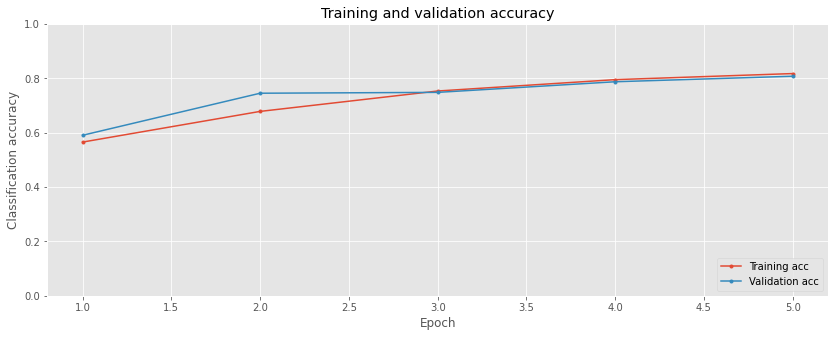

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [ ]:
# Retrieve the embedding layer's weights from the trained model
weights = model.layers[1].get_weights()[0]


In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('drive/MyDrive/Colab Notebooks', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('drive/MyDrive/Colab Notebooks', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [ ]:
# Create a SimpleRNN layer and test it
#Keras has 3 rnn layers: SimpleRNN, LSTM and GRU.

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [ ]:
# Note that only the final cell output is returned
sequence = tf.constant([[[1.,1.], [2., 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
print(layer_output)

tf.Tensor(
[[ 0.99999976  0.99999976 -0.99999976 -0.99999976 -0.99962175  0.99999976
  -0.99999976  0.99999976  0.99999976 -0.99999976 -0.99996233 -0.99999976
  -0.99999976 -0.99999976  0.99999976 -0.99999976]], shape=(1, 16), dtype=float32)


#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()
imdb_word_index = get_imdb_word_index()


1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [ ]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values())
embedding_dim = 16


In [ ]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=16),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])



#### Compile and fit the model

In [ ]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer='adam')


In [ ]:
# Fit the model and save its training history
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)


Epoch 1/3
536/536 [==============================] - 518s 958ms/step - loss: 0.5518 - accuracy: 0.6924 - val_loss: 0.3273 - val_accuracy: 0.8664
Epoch 2/3
536/536 [==============================] - 514s 960ms/step - loss: 0.2353 - accuracy: 0.9132 - val_loss: 0.3001 - val_accuracy: 0.8738
Epoch 3/3
536/536 [==============================] - 501s 934ms/step - loss: 0.1632 - accuracy: 0.9455 - val_loss: 0.3161 - val_accuracy: 0.8734


In [ ]:
model.evaluate(x_test,y_test)

550/550 [==============================] - 34s 62ms/step - loss: 0.3161 - accuracy: 0.8734


[0.3160691559314728, 0.8733795881271362]

#### Plot learning curves

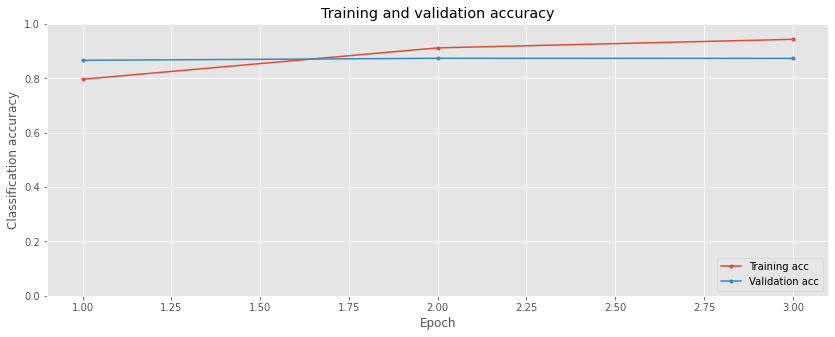

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [ ]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
#We see that it's a positive review, so predicted prob by model should be high
[inv_imdb_word_index[index] for index in x_test[0] if index > 2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [ ]:
# Get the model prediction using model.predict()
model.predict(x_test[None,0,:])


array([[0.04842341]], dtype=float32)

In [ ]:
# Get the corresponding label
y_test[0]


0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250, num_words=5000)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension
max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [ ]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=True),
                             tf.keras.layers.LSTM(units=32, return_sequences=False),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
#We can specify which layers is used for forward and backward flow, but in that
#case we also need to set go_backwards=True in the backward layer parameters
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(layer = tf.keras.layers.LSTM(units=8), 
                                                           backward_layer=, tf.keras.layers.GRU(units=8, go_backwards=True),
                                                           merge_mode= 'sum'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
                             tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(units=8, return_sequences=True), merge_mode='concat'),
                             tf.keras.layers.GRU(units=8, return_sequences=False),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])


#### Compile and fit the model

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
# Train the model, saving its history
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/3
536/536 [==============================] - 1446s 3s/step - loss: 0.5666 - accuracy: 0.6667 - val_loss: 0.3228 - val_accuracy: 0.8664
Epoch 2/3
536/536 [==============================] - 1437s 3s/step - loss: 0.2433 - accuracy: 0.9074 - val_loss: 0.3031 - val_accuracy: 0.8767
Epoch 3/3
536/536 [==============================] - 1430s 3s/step - loss: 0.1718 - accuracy: 0.9376 - val_loss: 0.3458 - val_accuracy: 0.8643


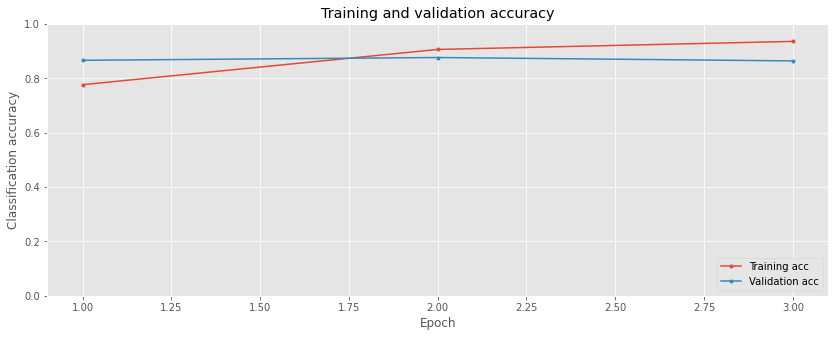

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);